# 13 Positional Encoding in Transformer Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 13.3 Coding the Positional Encoding Matrix from Scratch

Let's take a look at the fixed (as opposed to learned) positional encoding approach taken by the famous [AIAYN](https://arxiv.org/abs/1706.03762) paper which is implemented in most state of the art transfromers today:

In [23]:
def get_position_encoding(seq_len, d, n=10_000):
    # pos_enc = np.zeros((seq_len, d))
    # for k in range(seq_len):
    #     for i in np.arange(int(d / 2)):
    #         denominator = np.power(n, 2 * i / d)
    #         pos_enc[k, 2 * i] = np.sin(k / denominator)
    #         pos_enc[k, 2 * i + 1] = np.cos(k / denominator)
    
    k, i = np.mgrid[0:seq_len, 0 : int(d / 2)]
    denominator = np.power(n, 2 * i / d)
    pos_enc = np.zeros((seq_len, d))
    pos_enc[:, ::2] = np.sin(k / denominator)  # for even columns
    pos_enc[:, 1::2] = np.cos(k / denominator)  # for odd columns    
    
    return pos_enc


p = get_position_encoding(seq_len=4, d=4, n=100)
p

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.09983342,  0.99500417],
       [ 0.90929743, -0.41614684,  0.19866933,  0.98006658],
       [ 0.14112001, -0.9899925 ,  0.29552021,  0.95533649]])

## 13.4 Understanding the Positional Encoding Matrix

What do these actually look like?

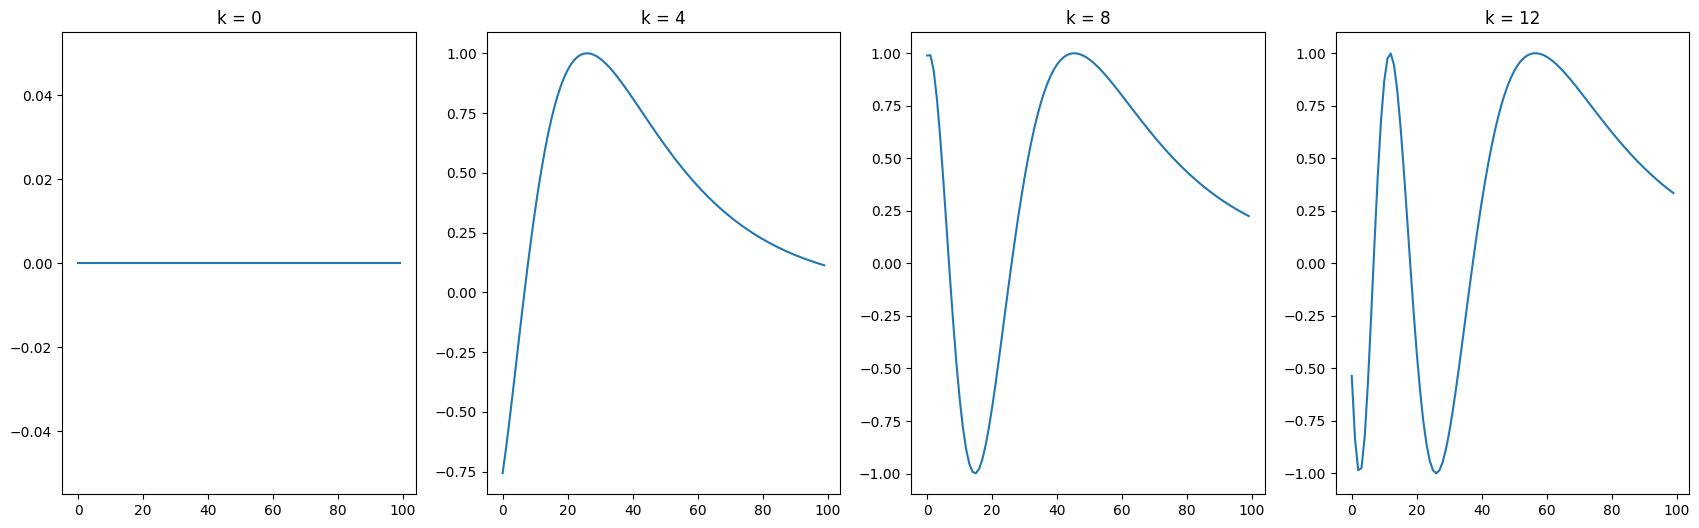

In [27]:
def plot_sinusoid(k, d=512, n=10_000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title(f"{k = }")

fig = plt.figure(figsize=(21, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plot_sinusoid(i * 4)
plt.show()    

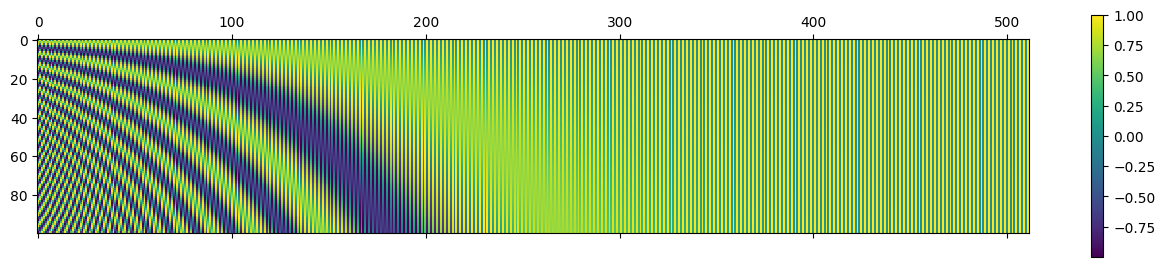

In [40]:
p = get_position_encoding(seq_len=100, d=512, n=10_000)
cax = plt.matshow(p)
plt.gcf().colorbar(cax);

## My Understanding and Interpretations
The wavelengths are geometrically increasing from $2\pi$ to $10000\cdot2\pi$ (so the frequencies _decrease_ in the same manner).  

Encoding elements higher along the embedding size (d) dimension with lower sinusoidal frequencies and earlier (lower) elements with higher frequencies is somewhat akin to encoding them with binary representations of integers where, as we count up, the lowest (rightmost) "bit" flips the most frequently and the highest (leftmost) "bit" changes the least frequently. But encoding with sinusoids (real numbers) is more efficient because we're dealing with floating point numbers and also for reasons that I'm sure are currently beyond my undestanding.  

Importantly, this seemingly arcane encoding scheme allows (or at least has been _theorized_ to allow) the model to capture absolute _and_ relative positional information. This is because the positional encoding for an offset position $i + \delta$ can be expressed as a linear projection (that is independent of $i$) of the positional encoding of position $i$ due to the mathematical properties of the functions used. For details, see Amirhossein Kazemnejad's blog post or the d2l resource linked to in the last section of this notebook.  

Other important properties:
- The embdeddings are deterministically fixed _and unique_ for each position.
- The embedding values are bounded between -1 and 1.
- The model can generalize to longer sequences.

**Remember:** Deep Learning in some sense is nothing but sophisticated high-order correlation detection/extraction machinery. So injecting these tiny but regular perturbations works because the model _will_ pick up on them in training. Also recall that there are residual connections all over transformers so signals are less prone to being lost.

## Resources for Further Reading
Below are some *excellent* resources I used in order to further my understanding of this topic. In no particular order:
* [Dive into Deep Learning > 11. Attention Mechanisms and Transformers > 11.6. Self-Attention and Positional Encoding](https://d2l.ai/chapter_attention-mechanisms-and-transformers/self-attention-and-positional-encoding.html)
* [Harvard NLP > The Annotated Transformer > Positional Encoding](http://nlp.seas.harvard.edu/2018/04/03/attention.html#positional-encoding)
* [Jay Alammar > The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
* [Amirhossein Kazemnejad's Blog > Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)
* [Lilian Weng's Blog "Lil'Log" > The Transformer Family Version 2.0 > Positional Encoding](https://lilianweng.github.io/posts/2023-01-27-the-transformer-family-v2/#positional-encoding)
* Master Positional Encoding (by Jonathan Kernes): [Part 1](https://towardsdatascience.com/master-positional-encoding-part-i-63c05d90a0c3) and [Part 2](https://towardsdatascience.com/master-positional-encoding-part-ii-1cfc4d3e7375)